In [210]:
import h5py

import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import canny
from scipy.ndimage import zoom
from scipy.ndimage import binary_opening, binary_erosion
from scipy.ndimage import label



In [211]:
# Import data
filePath = r"./processed_162.hdf5"
dataPath = f'default'

with h5py.File(filePath,'r') as f: 
    data = f[dataPath][()] # (rows, width, slices)

In [212]:
# Downsample
scaleFactor = .25
dataRescale = zoom(data, scaleFactor, order=1)
print(np.shape(dataRescale))

(238, 230, 213)


In [227]:
# Create canny edgemap of volume
edgeVolume = np.zeros(np.shape(dataRescale))

for i in range(dataRescale.shape[2]):
    edgeVolume[:,:,i] = canny(dataRescale[:,:,i],sigma=.5)

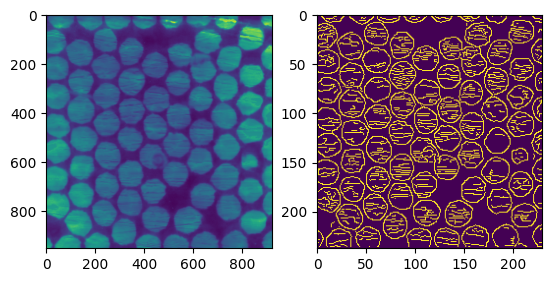

In [214]:
plt.subplot(1,2,1)
plt.imshow(data[:,:,100])

plt.subplot(1,2,2)
plt.imshow(edgeVolume[:,:,100])

13.601470508735444 13.601470508735444 (np.int64(17), np.int64(113), np.int64(115))


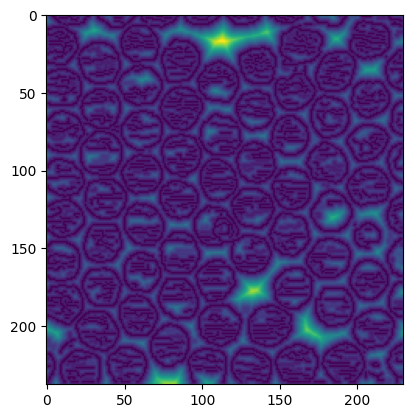

In [274]:
from scipy.ndimage import distance_transform_edt

dog = distance_transform_edt(~edgeVolume.astype(bool))
idx = np.unravel_index(np.argmax(dog), dog.shape)
print(max(dog.flatten()), dog[idx], idx)
plt.imshow(dog[:,:,200])

Max distance: 13.601470508735444 at index (np.int64(17), np.int64(113), np.int64(115))


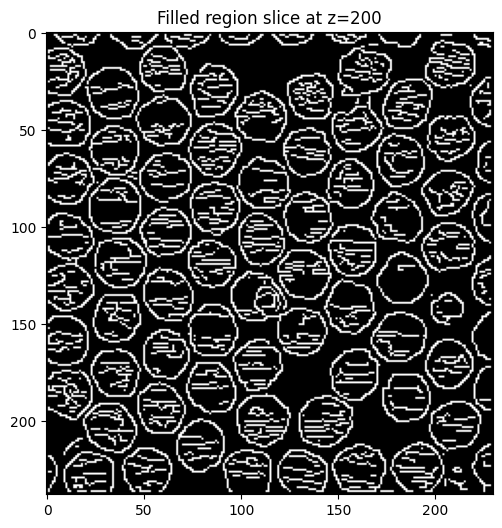

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt, binary_dilation, generate_binary_structure, binary_fill_holes

uwu = edgeVolume.astype(bool)

# compute distance transform inside closed shapes (invert edges)
dog = distance_transform_edt(~edgeVolume.astype(bool))

# find the voxel farthest from any edge (center of largest cavity)
idx = np.unravel_index(np.argmax(dog), dog.shape)
print("Max distance:", dog[idx], "at index", idx)

owo = binary_fill_holes(uwu, iterations)

# seed point for flood-fill (background)
seed = np.zeros_like(owo, dtype=bool)
seed[idx] = True

# 6-connected neighborhood for 3D (or 8-connected for 2D)
structure = generate_binary_structure(owo.ndim, 1)

# flood-fill outward from the seed, but stay within background (~edgeVolume)
background = binary_dilation(seed, structure=structure, mask=~owo, iterations=-1)

# Optional: invert to fill the closed shape interior
filled = ~background

# visualize
plt.figure(figsize=(6,6))
plt.imshow(filled[:,:,200], cmap='gray')
plt.title('Filled region slice at z=200')
plt.show()


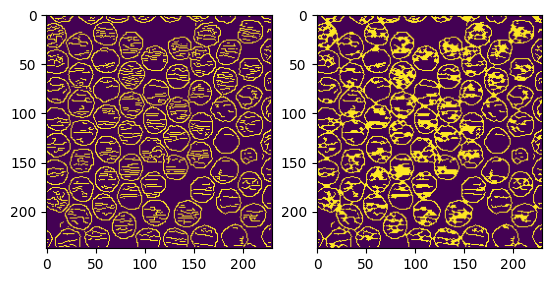

In [247]:
from scipy.ndimage import binary_fill_holes
from skimage.morphology import remove_small_holes, isotropic_closing

filled = isotropic_closing(edgeVolume.astype(np.int64), radius = 12, spacing=10)
plt.subplot(1,2,1)
plt.imshow(edgeVolume[:,:,100])
plt.subplot(1,2,2)
plt.imshow(filled[:,:,100])

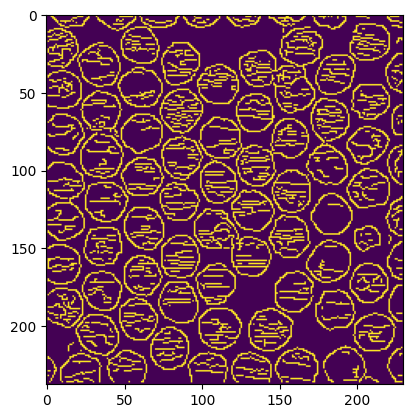

In [223]:
filled = binary_fill_holes(edgeVolume)

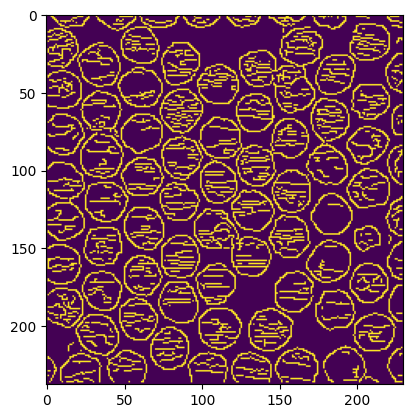

In [224]:
plt.imshow(filled[:,:,100])

In [215]:
from sklearn.cluster import DBSCAN

In [221]:
import open3d as o3d

coords = np.column_stack(edgeVolume > 0).astype(np.float32)

# Convert coordinates to point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(coords)

# Build octree
octree = o3d.geometry.Octree(max_depth=6)
octree.convert_from_point_cloud(pcd, size_expand=0.01)

# Visualize
o3d.visualization.draw_geometries([octree])


RuntimeError: Unable to cast Python instance of type <class 'numpy.ndarray'> to C++ type '?' (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

In [ ]:
# Perform DBSCAN clustering
epsilon = 0.15  # Chosen based on k-distance graph
min_samples = 5  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(edgeVolume)

ValueError: Found array with dim 3, while dim <= 2 is required by DBSCAN.

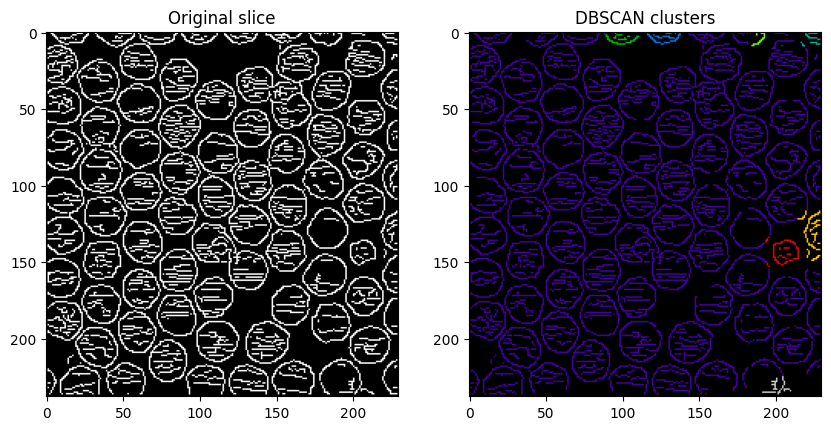

In [ ]:
slice_2d = edgeVolume[:,:,100]
coords = np.column_stack(np.nonzero(slice_2d))  # shape (n_points, 2)
# coords[:,0] = y (row), coords[:,1] = x (col)

# --- Run DBSCAN ---
epsilon = 6    # spatial radius in pixels (tune this)
min_samples = 20  # minimum number of points in a neighborhood
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(coords)

# --- Make a labeled mask ---
labeled_mask = np.zeros_like(slice_2d, dtype=int)
for label, (y, x) in zip(labels, coords):
    if label != -1:
        labeled_mask[y, x] = label + 1  # shift labels to be positive

# --- Visualize ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(slice_2d, cmap='gray')
plt.title("Original slice")

plt.subplot(1,2,2)
plt.imshow(labeled_mask, cmap='nipy_spectral')
plt.title("DBSCAN clusters")
plt.show()

In [ ]:
print(l)
print(a)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 

4553 4553


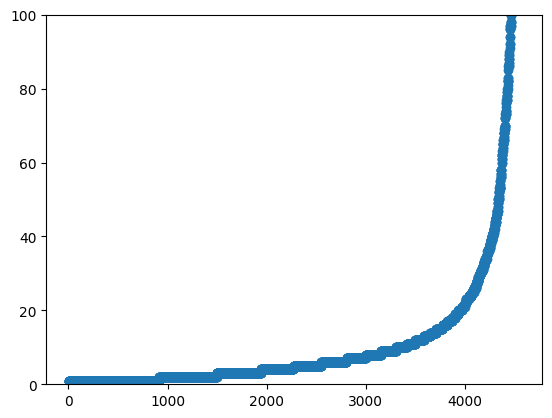

In [ ]:

meow = np.sort(a)
print(np.size(l),np.size(meow))
plt.ylim(0,100)
plt.scatter(l,meow)

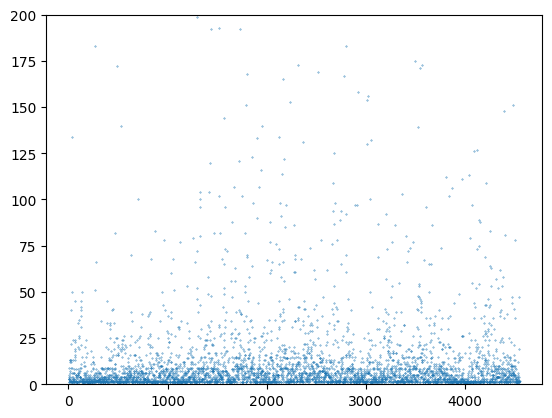

In [ ]:
plt.ylim(0,200)
plt.scatter(l,a, s=.1)

In [ ]:
A = []
for prop in props:
    print(prop.area_filled)

TypeError: 'numpy.float64' object is not iterable

In [ ]:
props = regionprops_table(
    dog,
    properties=('centroid', 'orientation', 'axis_major_length', 'axis_minor_length'),
)

AttributeError: 'list' object has no attribute 'ndim'

C:\Users\drews\AppData\Local\Temp\ipykernel_2248\304023522.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


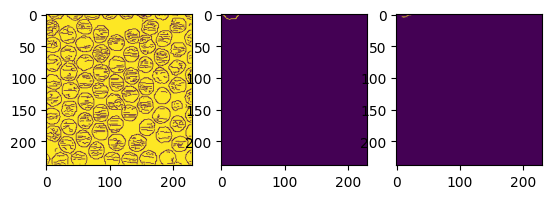

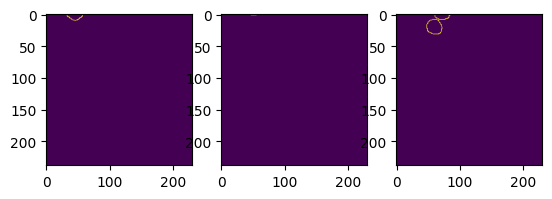

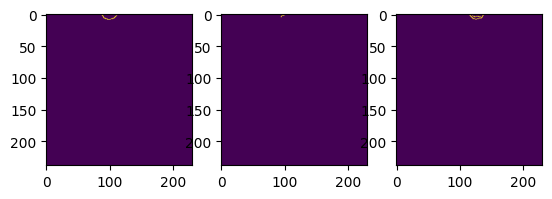

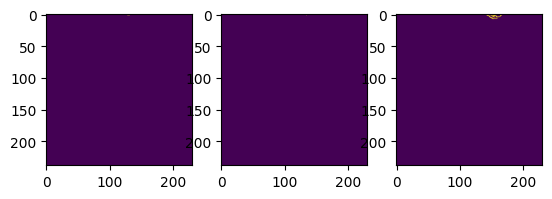

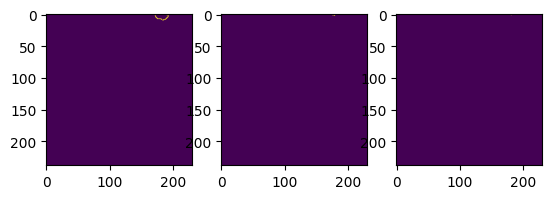

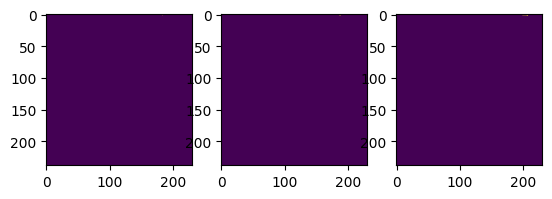

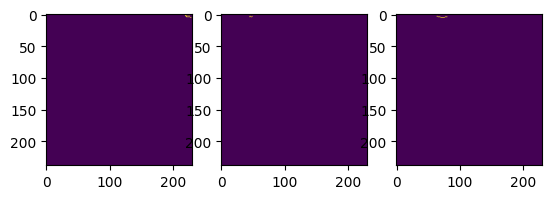

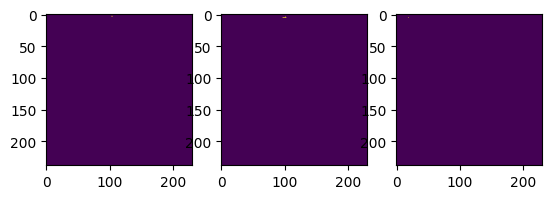

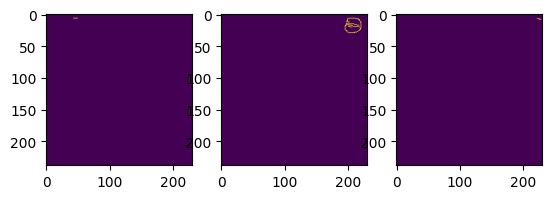

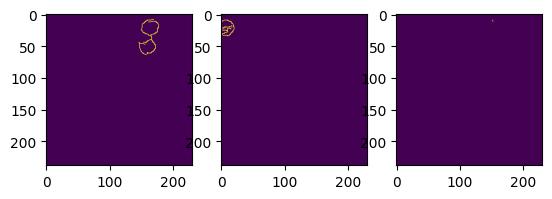

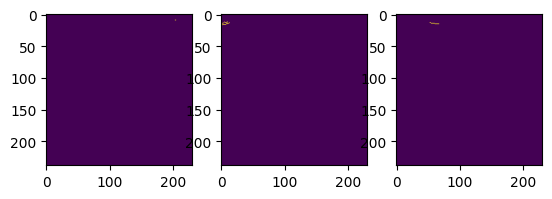

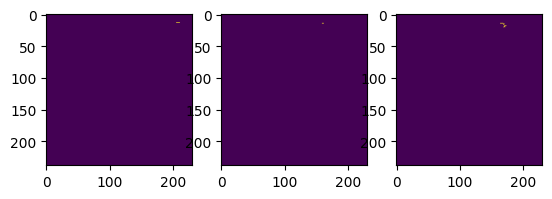

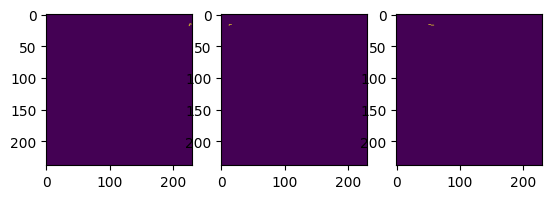

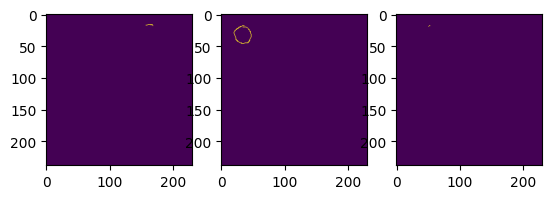

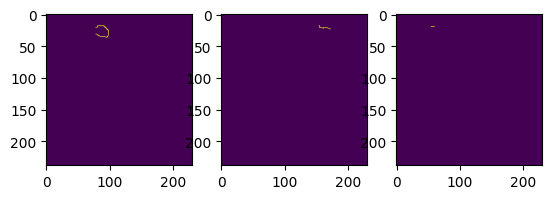

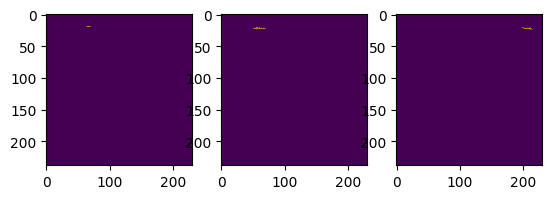

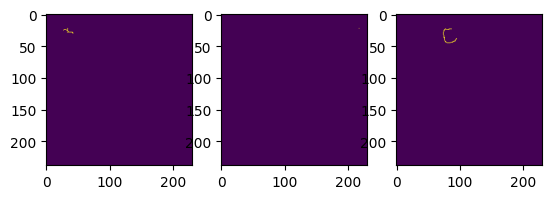

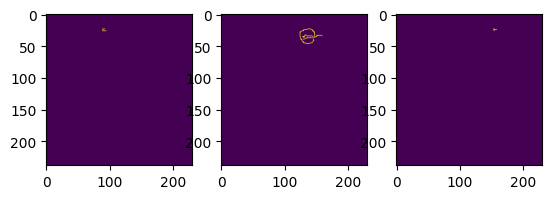

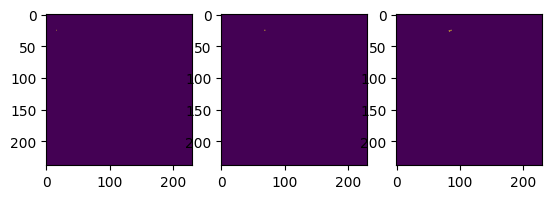

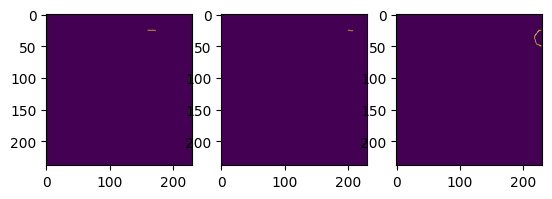

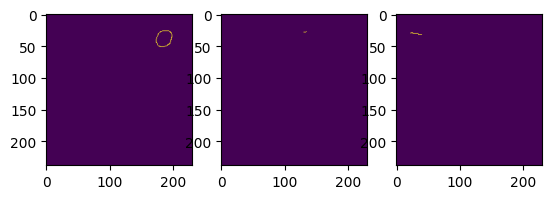

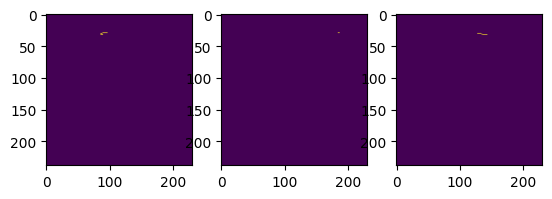

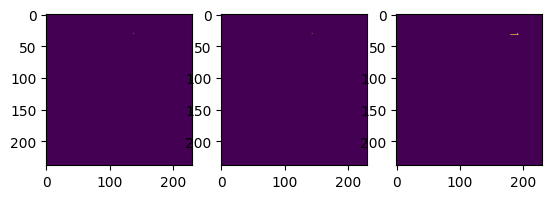

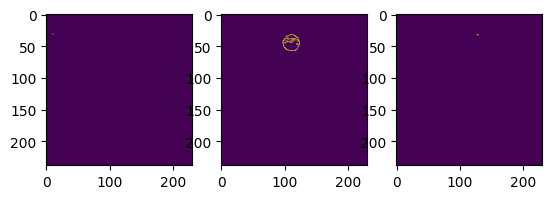

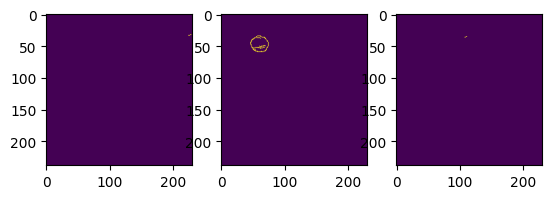

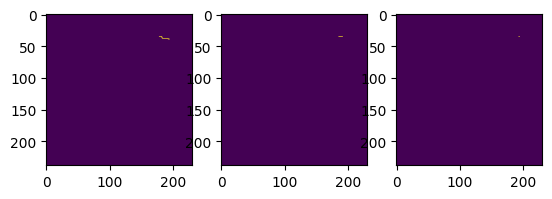

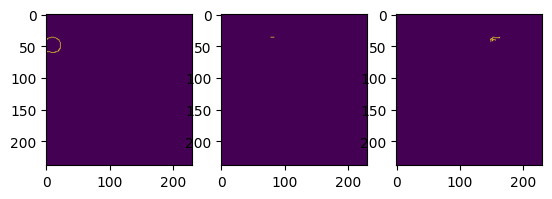

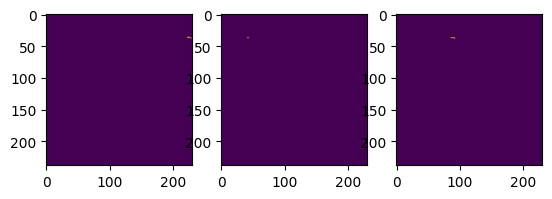

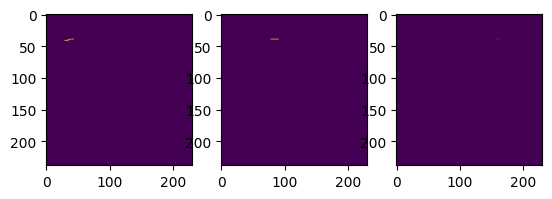

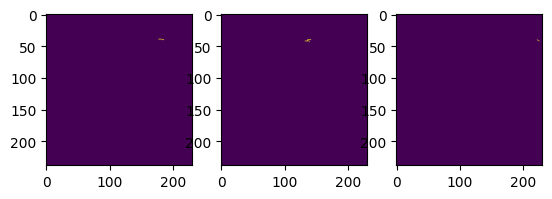

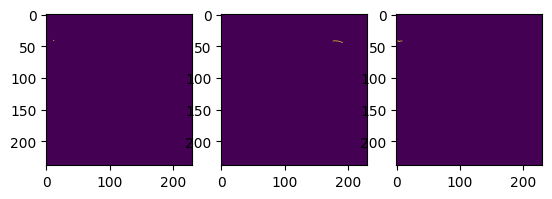

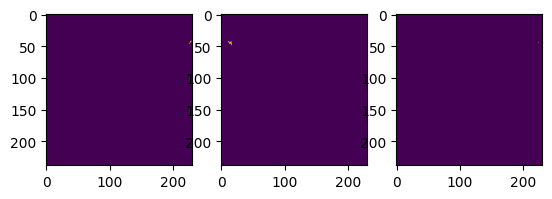

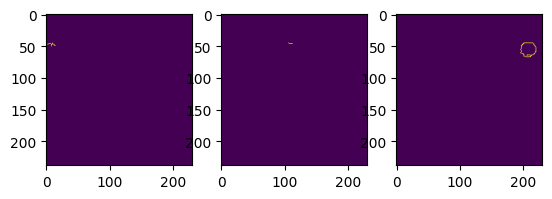

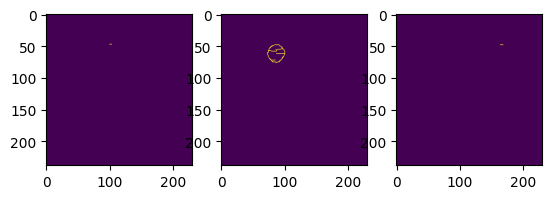

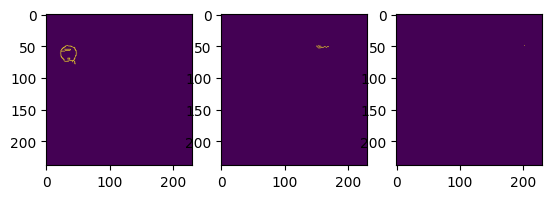

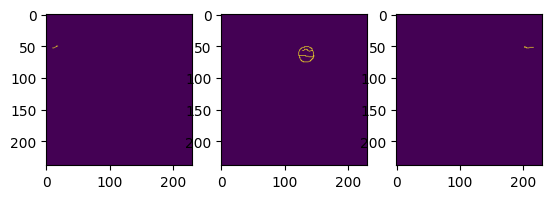

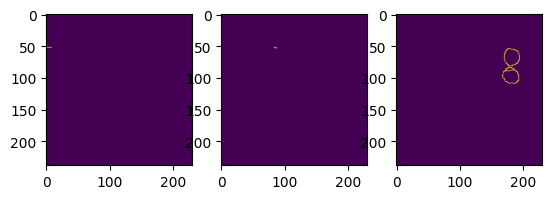

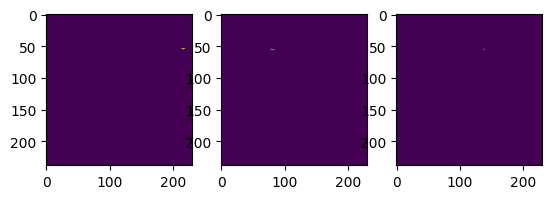

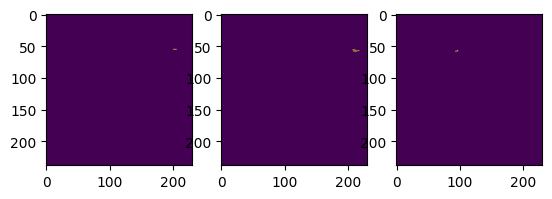

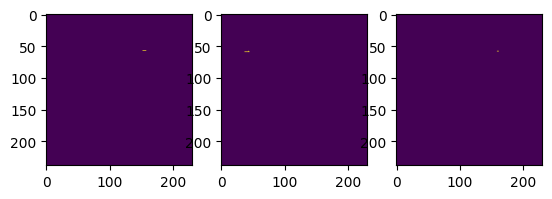

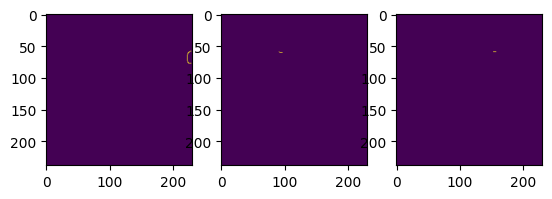

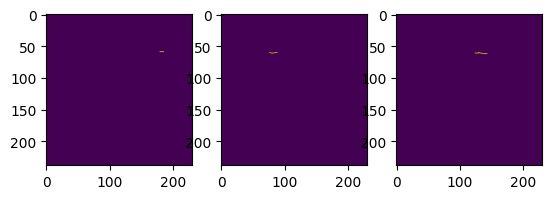

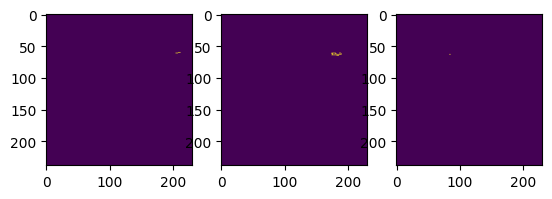

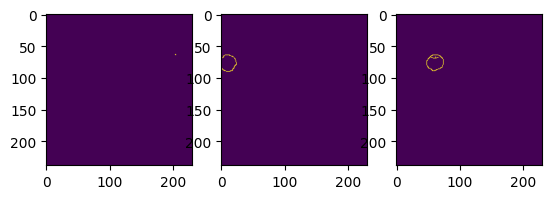

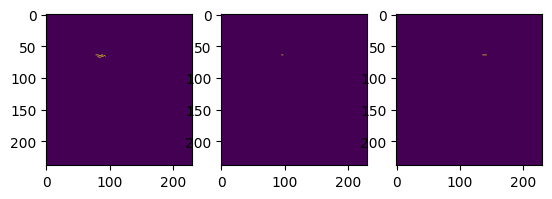

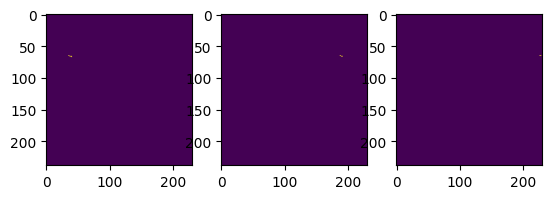

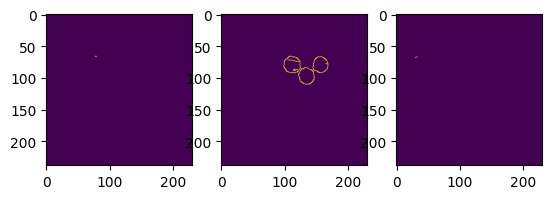

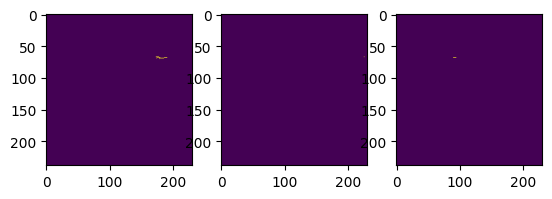

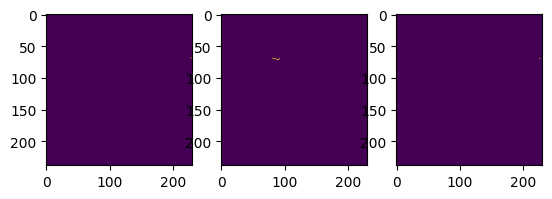

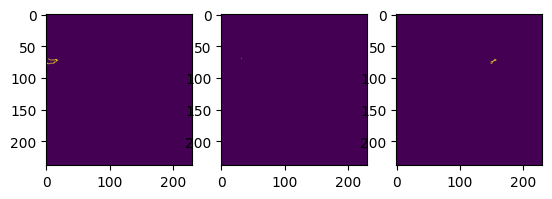

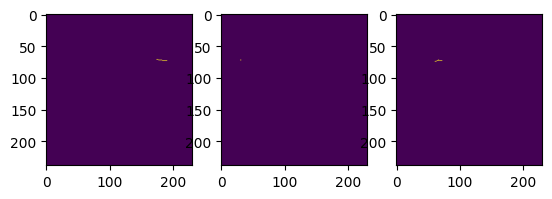

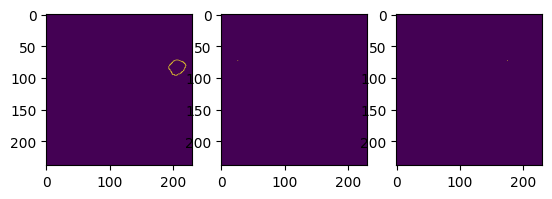

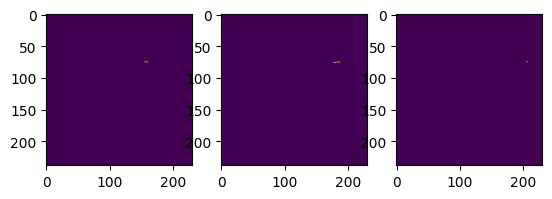

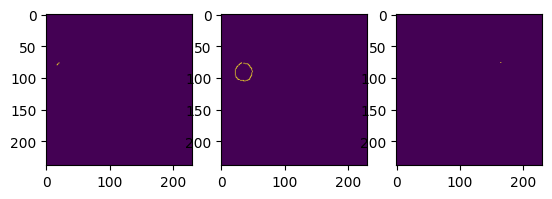

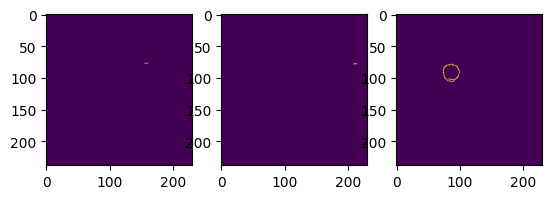

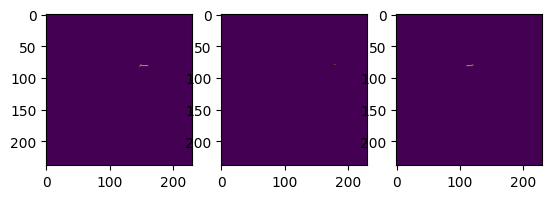

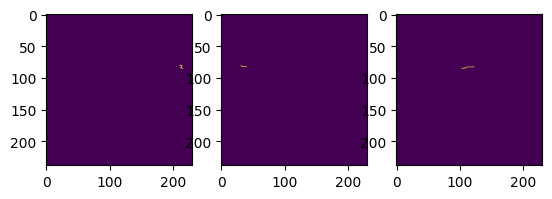

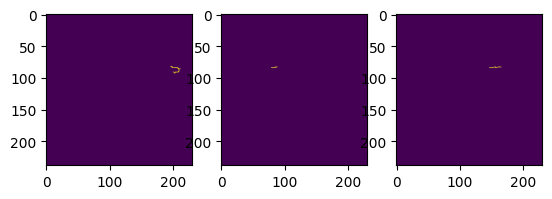

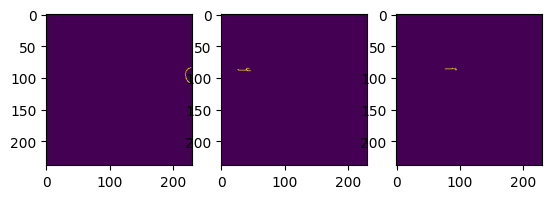

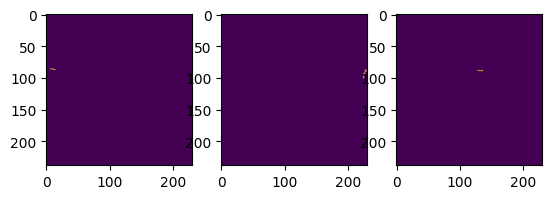

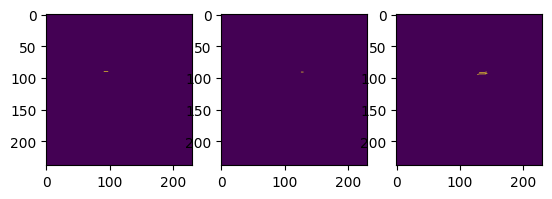

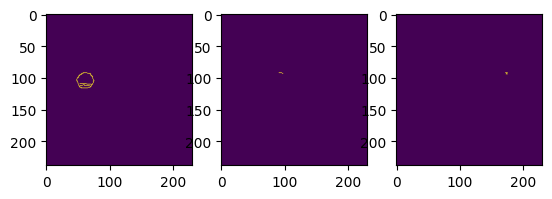

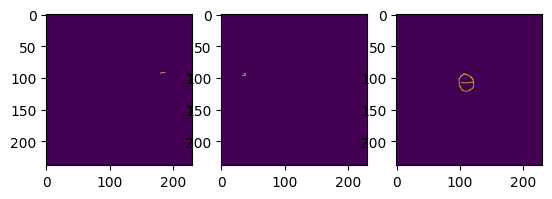

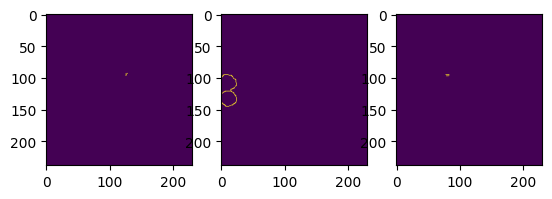

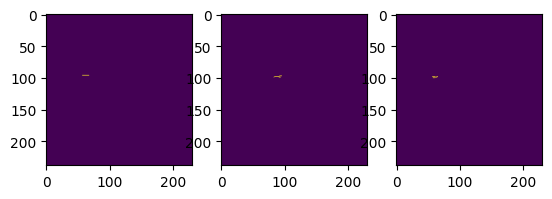

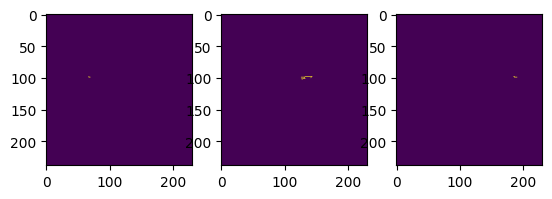

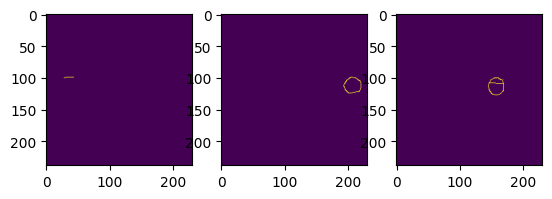

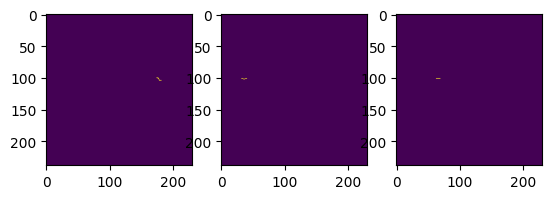

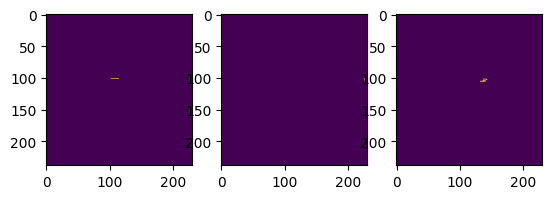

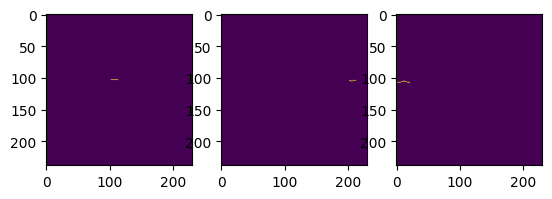

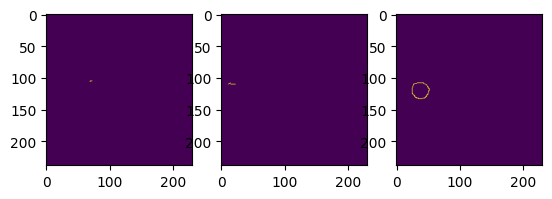

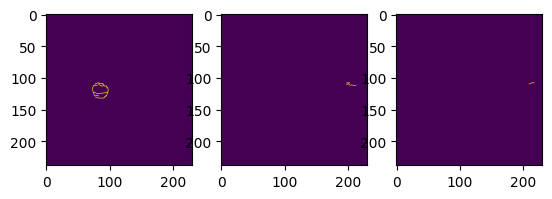

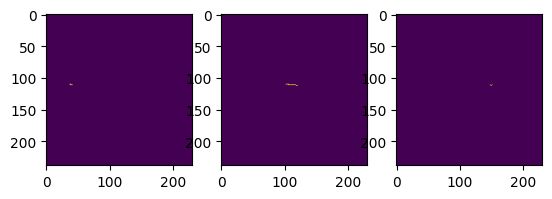

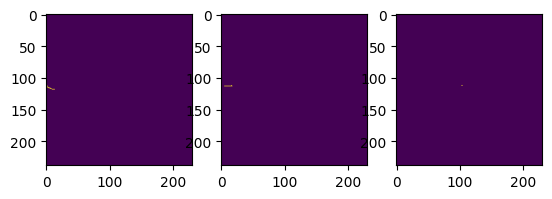

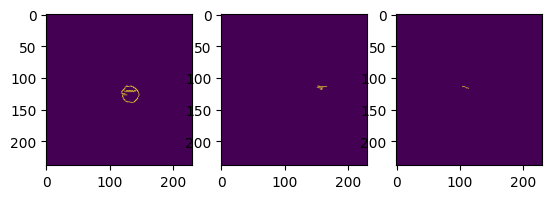

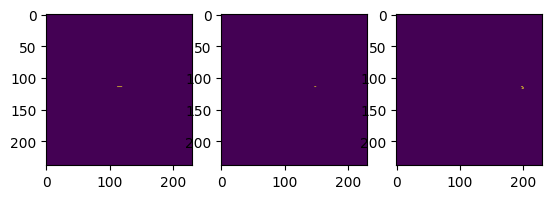

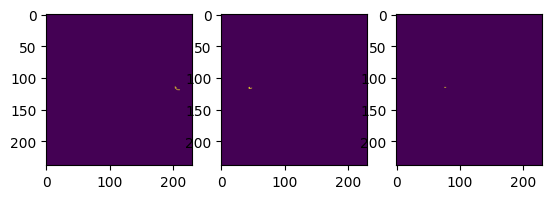

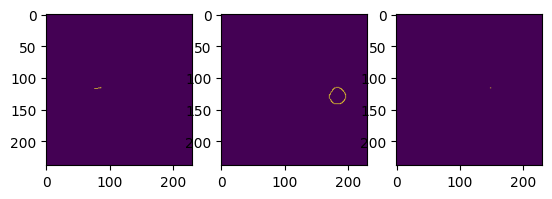

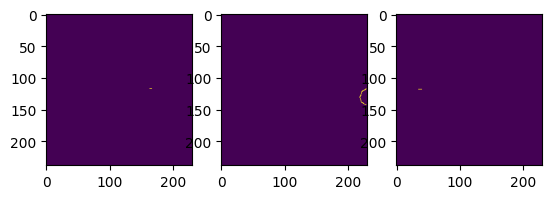

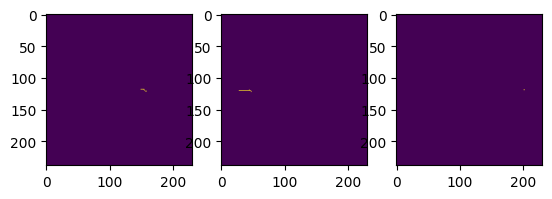

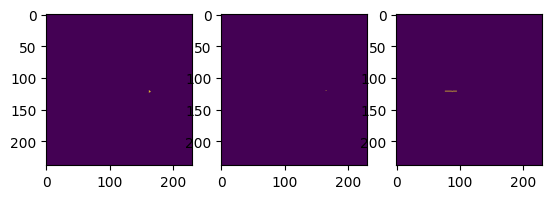

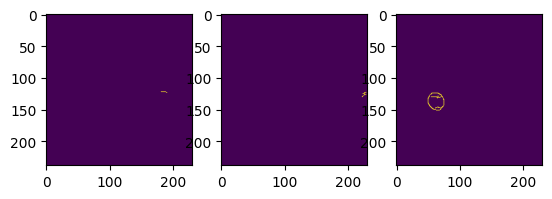

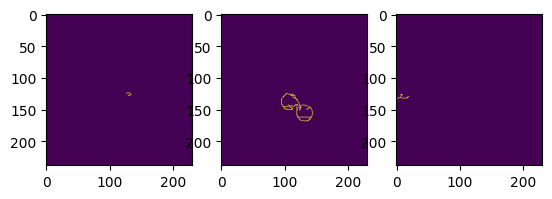

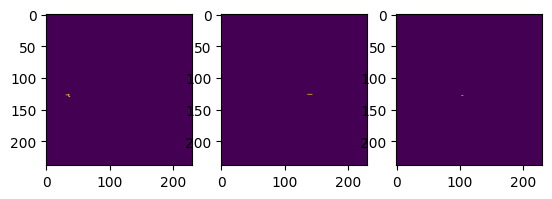

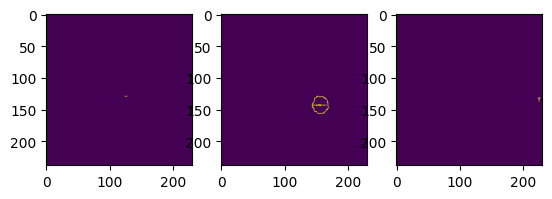

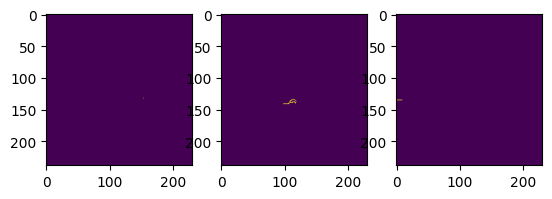

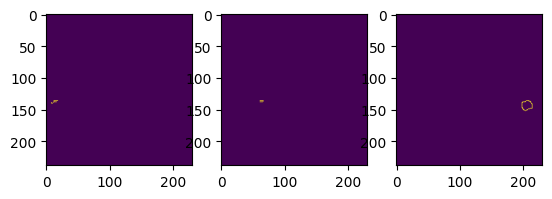

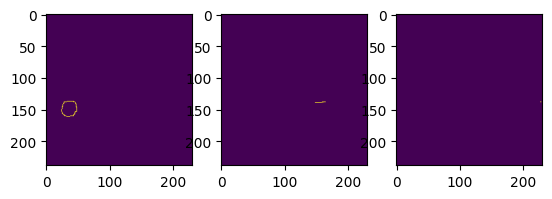

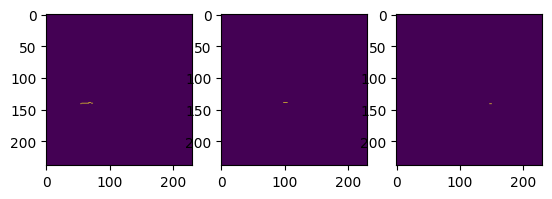

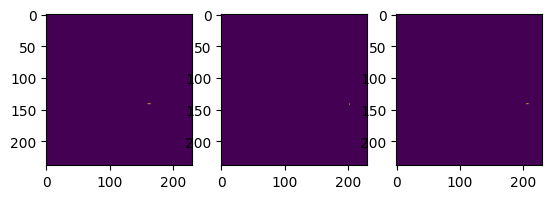

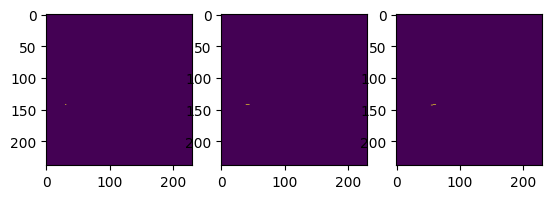

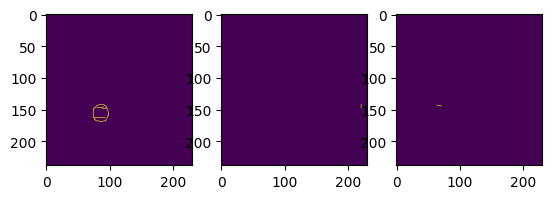

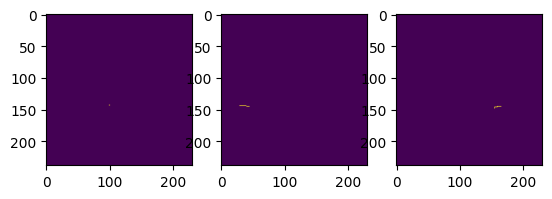

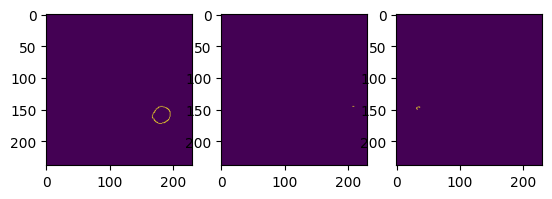

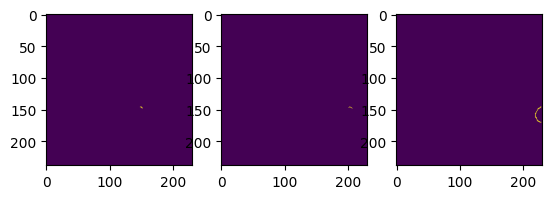

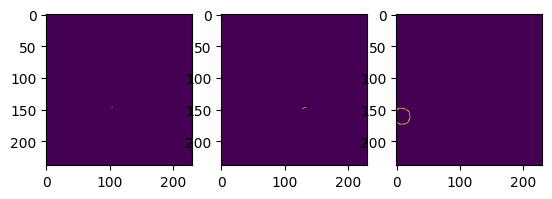

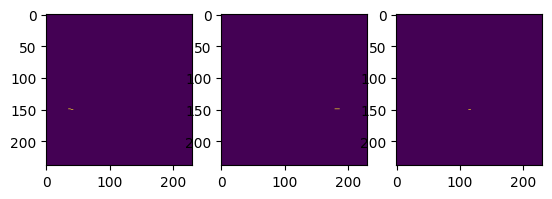

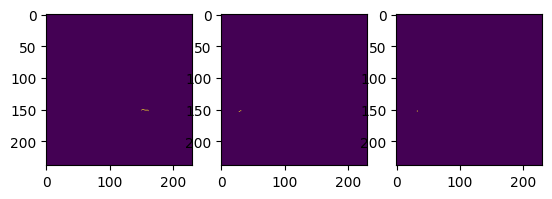

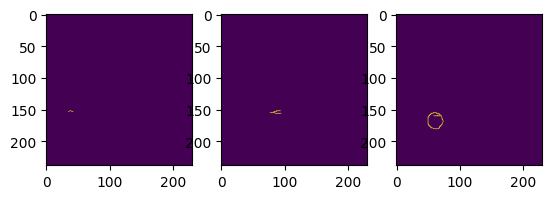

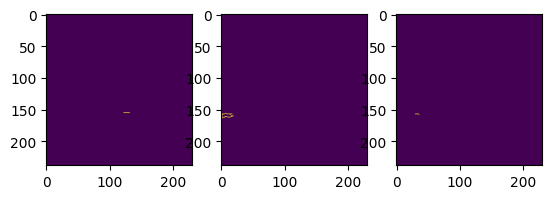

In [ ]:
for i in range(100):
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(labeled == 3*i)

    plt.subplot(1,3,2)
    plt.imshow(labeled == 3*i+1)
    
    plt.subplot(1,3,3)
    plt.imshow(labeled == 3*i+2)